In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.linear_model import LogisticRegression

In [2]:
df=pd.read_csv("h1n1_vaccine_prediction.csv")

In [3]:
df.head()

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


In [4]:
df['h1n1_vaccine'].value_counts()

0    21033
1     5674
Name: h1n1_vaccine, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   unique_id                  26707 non-null  int64  
 1   h1n1_worry                 26615 non-null  float64
 2   h1n1_awareness             26591 non-null  float64
 3   antiviral_medication       26636 non-null  float64
 4   contact_avoidance          26499 non-null  float64
 5   bought_face_mask           26688 non-null  float64
 6   wash_hands_frequently      26665 non-null  float64
 7   avoid_large_gatherings     26620 non-null  float64
 8   reduced_outside_home_cont  26625 non-null  float64
 9   avoid_touch_face           26579 non-null  float64
 10  dr_recc_h1n1_vacc          24547 non-null  float64
 11  dr_recc_seasonal_vacc      24547 non-null  float64
 12  chronic_medic_condition    25736 non-null  float64
 13  cont_child_undr_6_mnths    25887 non-null  flo

In [6]:
df.shape

(26707, 34)

In [7]:
df.columns

Index(['unique_id', 'h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc',
       'chronic_medic_condition', 'cont_child_undr_6_mnths',
       'is_health_worker', 'has_health_insur', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'income_level', 'marital_status', 'housing_status',
       'employment', 'census_msa', 'no_of_adults', 'no_of_children',
       'h1n1_vaccine'],
      dtype='object')

In [8]:
df.drop(['unique_id','qualification','race','sex','income_level','marital_status','housing_status','employment','census_msa','age_bracket'],inplace=True,axis=1)

In [9]:
df.dtypes

h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
dr_recc_h1n1_vacc            float64
dr_recc_seasonal_vacc        float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
has_health_insur             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
no_of_adults                 float64
no_of_children               float64
h1n1_vaccine                   int64
dtype: object

In [10]:
df.shape

(26707, 24)

In [11]:
for i in df.columns:
    if df[i].isna().sum()>0:
        print(i,'\t',df[i].skew())

h1n1_worry 	 -0.15991331855479937
h1n1_awareness 	 -0.23922412943815266
antiviral_medication 	 4.186503055419146
contact_avoidance 	 -1.0113062352536981
bought_face_mask 	 3.4017441908304615
wash_hands_frequently 	 -1.7163798129110304
avoid_large_gatherings 	 0.589522391759364
reduced_outside_home_cont 	 0.6882273224663391
avoid_touch_face 	 -0.7583546689606071
dr_recc_h1n1_vacc 	 1.349741944706777
dr_recc_seasonal_vacc 	 0.7243971219130038
chronic_medic_condition 	 0.9620972048351695
cont_child_undr_6_mnths 	 3.033007715661237
is_health_worker 	 2.462087258889016
has_health_insur 	 -2.334908664405658
is_h1n1_vacc_effective 	 -0.9027057052226893
is_h1n1_risky 	 0.67295655788336
sick_from_h1n1_vacc 	 0.6512805474905151
is_seas_vacc_effective 	 -1.3151765634634358
is_seas_risky 	 0.2509228605713991
sick_from_seas_vacc 	 0.9195873019246301
no_of_adults 	 0.7865724774964112
no_of_children 	 1.5439029767931363


In [12]:
for i in df.columns:
    df[i]=df[i].fillna(df[i].mode()[0])

In [23]:
df.isna().sum()

h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
has_health_insur             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
no_of_adults                 0
no_of_children               0
h1n1_vaccine                 0
dtype: int64

In [13]:
df['h1n1_vaccine'].value_counts()

0    21033
1     5674
Name: h1n1_vaccine, dtype: int64

<AxesSubplot:>

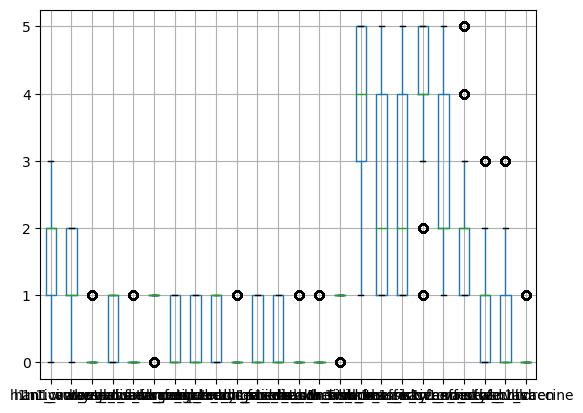

In [14]:
df.boxplot()

In [15]:
x=df.drop(['h1n1_vaccine'],axis=1)

In [16]:
y=df['h1n1_vaccine']

In [17]:
y.value_counts()

0    21033
1     5674
Name: h1n1_vaccine, dtype: int64

In [18]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,random_state=2,test_size=0.3)

In [19]:
log=LogisticRegression()
log.fit(xtrain,ytrain)

LogisticRegression()

In [20]:
pred=log.predict(xtest)

In [21]:
accuracy_score(ytest,pred)

0.8332709347310621

In [22]:
classification_report(ytest,pred)

'              precision    recall  f1-score   support\n\n           0       0.85      0.95      0.90      6263\n           1       0.71      0.40      0.51      1750\n\n    accuracy                           0.83      8013\n   macro avg       0.78      0.68      0.71      8013\nweighted avg       0.82      0.83      0.81      8013\n'